# TME 2 : Fourier transform

This course is dedicated to the study of the discrete Fourier transform applied on the two following images:

<div>
    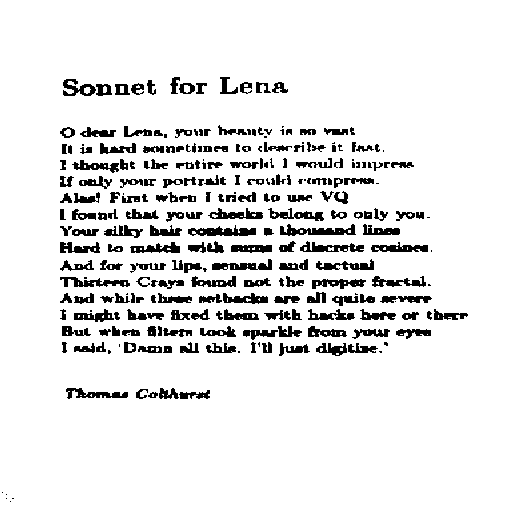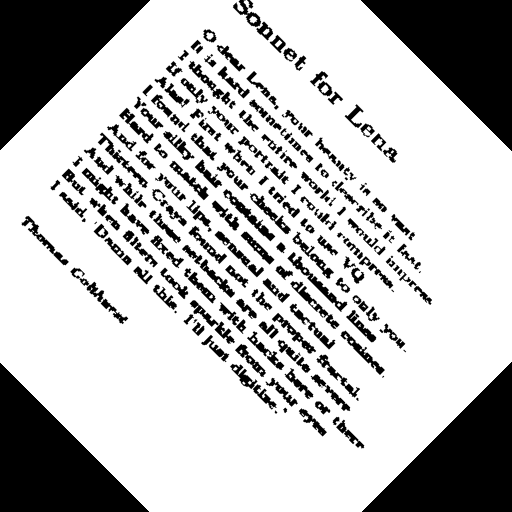
</div>

and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.gif'))
sonrot = np.array(Image.open('img/sonrot.gif'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of complex an array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    return np.fft.fft2(I)
    """ Array -> Array[complex] """

def toVisualizeFT(If):
    return np.fft.fftshift(np.abs(If))
    """ Array[complex] -> Array[float] """

def toVisualizeLogFT(If):
    return np.log(1+np.fft.fftshift(np.abs(If)))
    """ Array[complex] -> Array[float] """




2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

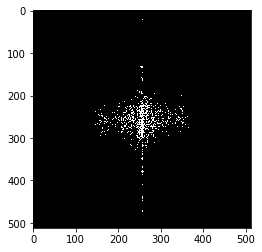

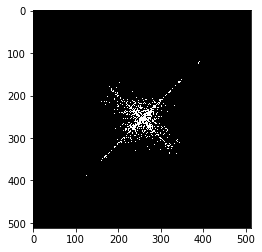

In [8]:
import matplotlib.pyplot as plt

def thresholdImage(I,s):
    """ Array*int -> Array """
    #return np.where(I<s,0,255)
    return (I>=s)*255
    
plt.gray()
# your code below
ftson=computeFT(son)
ftsonrot=computeFT(sonrot)
moduleftson=toVisualizeFT(ftson)
moduleftsonrot=toVisualizeFT(ftsonrot)


plt.imshow(thresholdImage(moduleftson,10**5))
plt.show()
plt.imshow(thresholdImage(moduleftsonrot,10**5))
plt.show()





3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Les résultats nous montrent que la transformation de fourier change en fonction de la rotation de l'image

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    
    """ Array**2*float -> Array """
    return alpha*I1+(1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

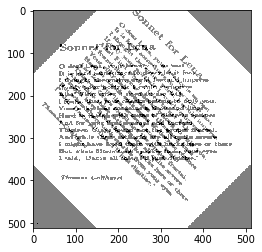

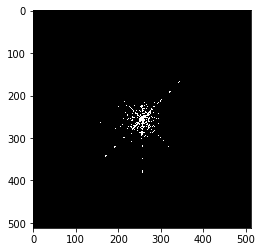

In [5]:
# your code below

son1=blend(son,sonrot,0.5)

ftson=computeFT(son1)

plt.imshow(son1)
plt.show()

moduleftson=toVisualizeFT(ftson)


plt.imshow(thresholdImage(moduleftson,10**5))
plt.show()


6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

En comparant les résultats avec ceux de la question 2, on se rend compte que cette fois ci les 2 images superposées sont représentées par la transformée de fourier mais avec une intensité mais forte. Le $\alpha$ fait varier les intensités des images, les rendants plus ou moins représentées dans la transformée de fourier

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

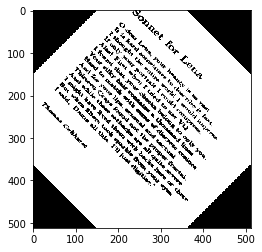

<function matplotlib.pyplot.show(*args, **kw)>

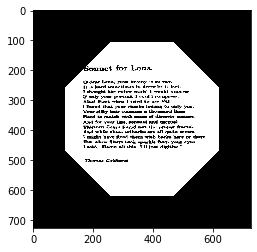

In [26]:
def rectifyOrientation(I):
    
    plt.imshow(I)
    plt.show()
    
    ftson=computeFT(I)
    
    moduleftson=toVisualizeFT(ftson)

    save=thresholdImage(moduleftson,3*10**(5))
    
    save=mainOrientation(save)

    rectified_image=rotateImage(I,-save[1])
    
    return rectified_image
    

def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n,m = I.shape

    size = 32  
   
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array """
    return np.array(Image.fromarray(I).rotate(a, expand=True))

####### your code below
plt.imshow(rectifyOrientation(sonrot))
plt.show

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

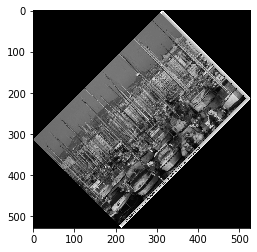

<function matplotlib.pyplot.show(*args, **kw)>

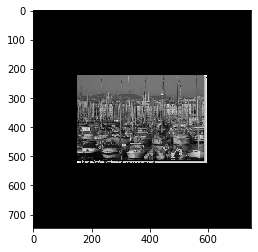

In [28]:
port = np.array(Image.open('img/port.jpg'))
plt.imshow(rectifyOrientation(rotateImage(port,45)))
plt.show